In [132]:
import pandas as pd
import numpy as np
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network


In [133]:
# input dataset
input_data = '/projects/genomic-ml/da2343/ml_project_2/data/EURUSD/EURUSD_H1_2011_2015_TRADES_binary.csv'
# location of two output files
mode = 'correlated_attribute_mode'
description_file = f'/projects/genomic-ml/da2343/ml_project_2/hpc/synthetic_data_gen/out/{mode}/description.json'
synthetic_data = f'/projects/genomic-ml/da2343/ml_project_2/hpc/synthetic_data_gen/out/{mode}/sythetic_data.csv'

In [134]:
# An attribute is categorical if its domain size is less than this threshold.
# Here modify the threshold to adapt to the domain size of "education" (which is 14 in input dataset).
threshold_value = 10

# specify categorical attributes
# categorical_attributes = {'education': True}
categorical_attributes = {'label': True}

# specify which attributes are candidate keys of input dataset.
# candidate_keys = {'ssn': True}
candidate_keys = {'index': True}

# A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not 
# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
epsilon = 50

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 5

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = 100_000 # Here 32561 is the same as input dataset, but it can be set to another number.

In [135]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon, 
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_is_categorical=categorical_attributes,
                                                        attribute_to_is_candidate_key=candidate_keys)
describer.save_dataset_description_to_file(description_file)


================ Constructing Bayesian Network (BN) ================
Adding ROOT label
Adding attribute RSI
Adding attribute ADX
Adding attribute position
========================== BN constructed ==========================


/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/DataSynthesizer/lib/PrivBayes.py:275: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for parents_instance, stats_sub in stats.groupby(parents):


In [136]:
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    RSI      has parents ['label'].
    ADX      has parents ['RSI', 'label'].
    position has parents ['RSI', 'ADX', 'label'].


In [137]:
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/DataSynthesizer/ModelInspector.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_priv.iteritems():
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/DataSynthesizer/ModelInspector.py:85: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_synt.iteritems():
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/DataSynthesizer/ModelInspector.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_priv.iteritems():
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/DataSynthesizer/ModelInspector.py:85: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_synt.iteritems():


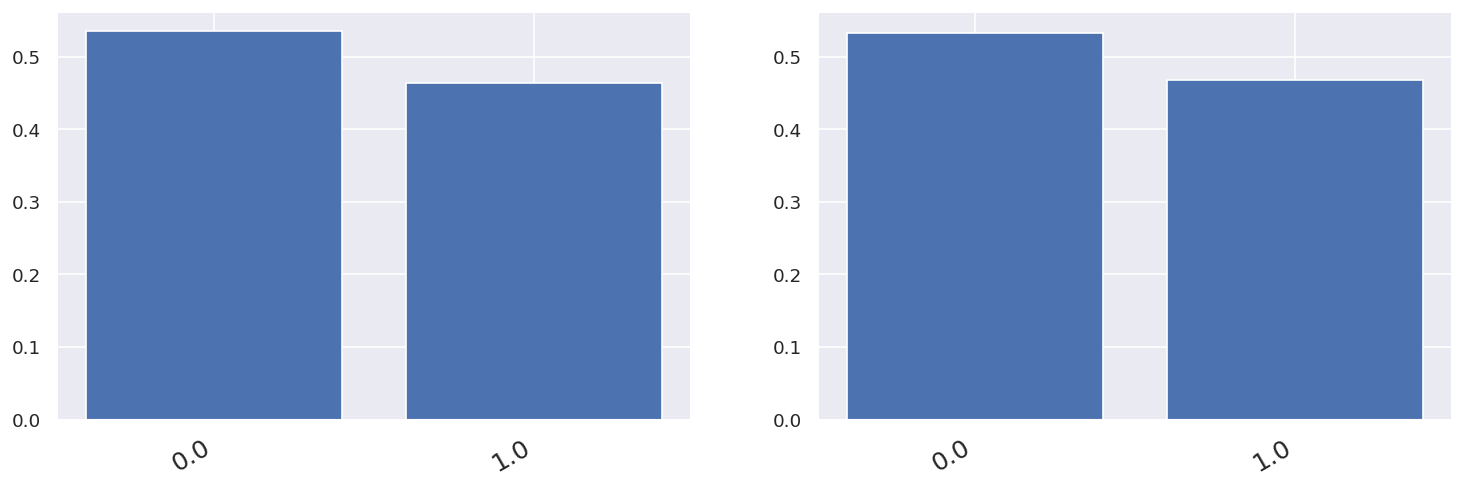

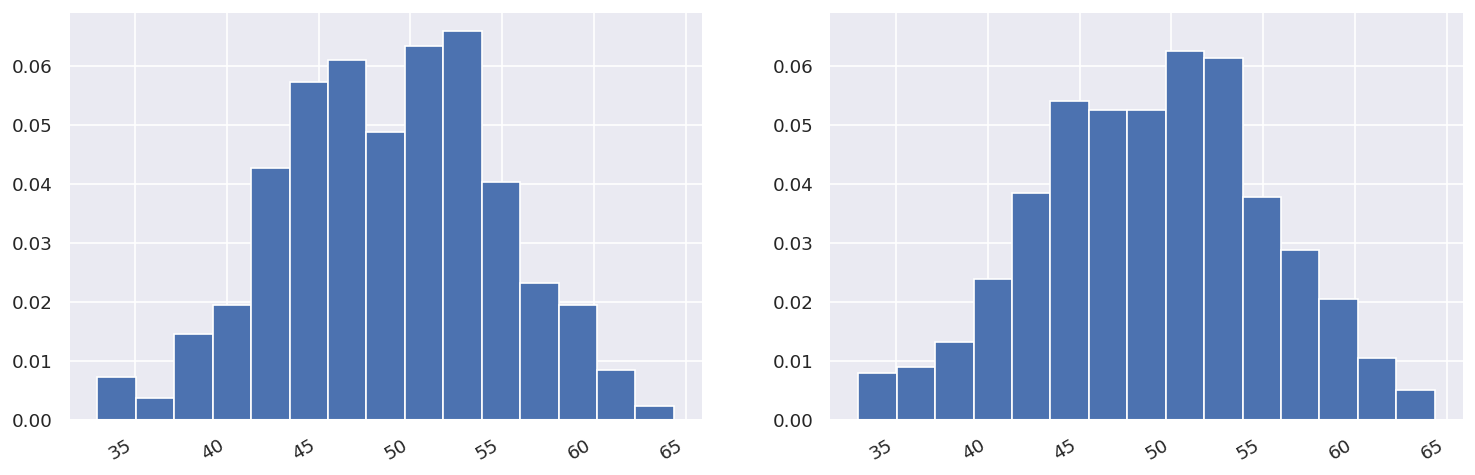

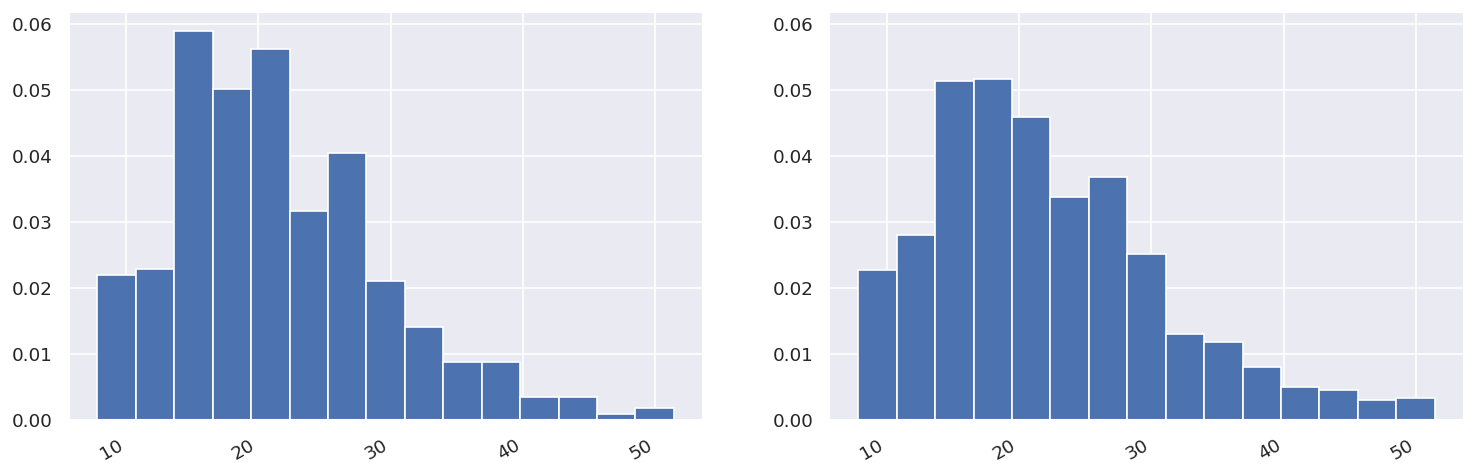

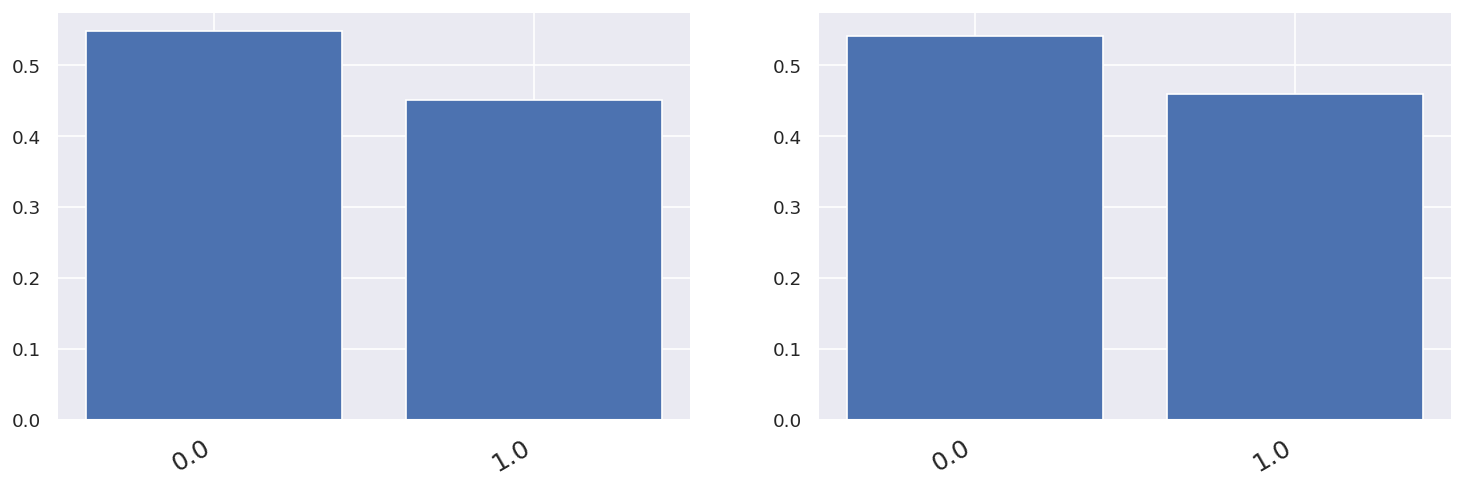

In [138]:
# Read both datasets using Pandas.
input_df = pd.read_csv(input_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data)
# Read attribute description from the dataset description file.
attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)

for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)